In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_discharging_raw = pd.read_parquet('./data/processed/df_discharging_raw.parquet')
df_discharging_raw.head()

,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Hood Position [Up] or [Closed],Window Position [Closed] or [Down],Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Charge
0,-10.0,0.009,-12.170,22.256,40.693,0.0,-0.043,0.438,0.0,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
1,-9.9,0.010,-12.332,22.256,40.696,0.0,-0.037,0.437,0.0,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
2,-9.8,0.010,-12.272,22.256,40.694,0.0,-0.048,0.435,0.0,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
3,-9.7,0.009,-12.146,22.256,40.694,0.0,-0.052,0.438,0.0,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
4,-9.6,0.010,-12.240,22.255,40.693,0.0,-0.050,0.439,0.0,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2


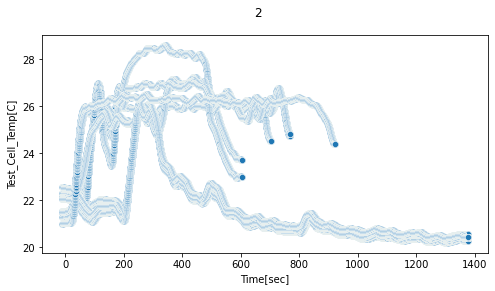

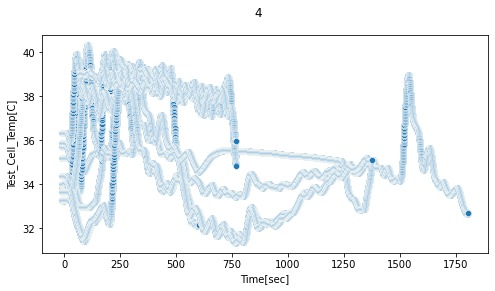

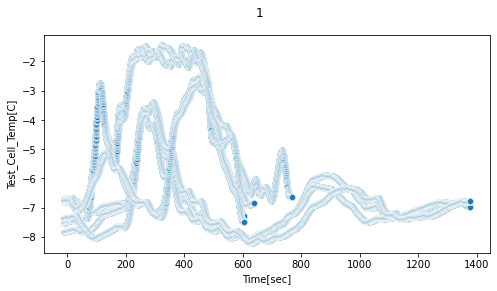

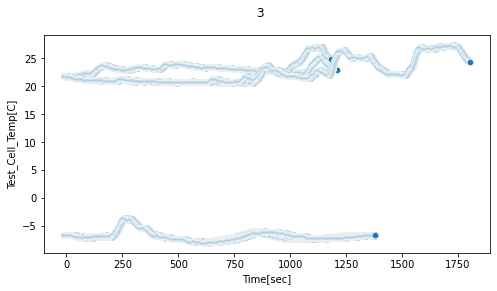

In [13]:
# Each graph represents a charge
charge_ids = df_discharging_raw['Charge'].unique()

for id_c in charge_ids:
    f = plt.figure(figsize=(8, 4))
    
    test_ids = df_discharging_raw.loc[df_discharging_raw['Charge'] == id_c]['Test ID [#]'].unique()
    test_data = pd.DataFrame()
    actual_test= pd.DataFrame()
    for id_t in test_ids:
        actual_test = df_discharging_raw[df_discharging_raw['test_id'] == id_t]
        test_data = pd.concat([test_data, actual_test])
    sns.scatterplot(x='Time[sec]', y='Test_Cell_Temp[C]', palette='hls', data=test_data)
    f.suptitle(f"{id_c}")

In [10]:
df_discharging_raw['Charge'].unique()
test_ids = df_discharging_raw.loc[df_discharging_raw['Charge'] == 1]['Test ID [#]']
test_ids

197135    61403061
197136    61403061
197137    61403061
197138    61403061
197139    61403061
            ...   
265284    61403067
265285    61403067
265286    61403067
265287    61403067
265288    61403067
Name: Test ID [#], Length: 68154, dtype: object